<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Загрузка-данных" data-toc-modified-id="Загрузка-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Загрузка данных</a></span></li><li><span><a href="#Умножение-матриц" data-toc-modified-id="Умножение-матриц-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Умножение матриц</a></span></li><li><span><a href="#Алгоритм-преобразования" data-toc-modified-id="Алгоритм-преобразования-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Алгоритм преобразования</a></span></li><li><span><a href="#Проверка-алгоритма" data-toc-modified-id="Проверка-алгоритма-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Проверка алгоритма</a></span></li><li><span><a href="#Общий-вывод" data-toc-modified-id="Общий-вывод-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Общий вывод</a></span></li><li><span><a href="#Чек-лист-проверки" data-toc-modified-id="Чек-лист-проверки-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Чек-лист проверки</a></span></li></ul></div>

# Защита персональных данных клиентов

В проекте стоит задача защитить данные клиентов страховой компании «Хоть потоп». Необходимо разработать такой метод преобразования данных, чтобы по ним было сложно восстановить персональную информацию. Корректность его работы надо обосновать.

Нужно защитить данные, чтобы при преобразовании качество моделей машинного обучения не ухудшилось. 

## Загрузка данных

Загружаем необходимые библиотеки и модули.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

Загрузим и изучим данные.

In [2]:
data = pd.read_csv('/datasets/insurance.csv')
data.head()

,Пол,Возраст,Зарплата,Члены семьи,Страховые выплаты
0,1,41.0,49600.0,1,0
1,0,46.0,38000.0,1,1
2,0,29.0,21000.0,0,0
3,0,21.0,41700.0,2,0
4,1,28.0,26100.0,0,0


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Пол                5000 non-null   int64  
 1   Возраст            5000 non-null   float64
 2   Зарплата           5000 non-null   float64
 3   Члены семьи        5000 non-null   int64  
 4   Страховые выплаты  5000 non-null   int64  
dtypes: float64(2), int64(3)
memory usage: 195.4 KB


In [4]:
data.duplicated().sum()

153

Пропусков нет. Удалим дубликаты и приведем столбец 'Возраст' к целочисленному типу.

In [5]:
data = data.drop_duplicates().reset_index(drop=True)
data['Возраст'] = data['Возраст'].astype('int')
data.duplicated().sum()

0

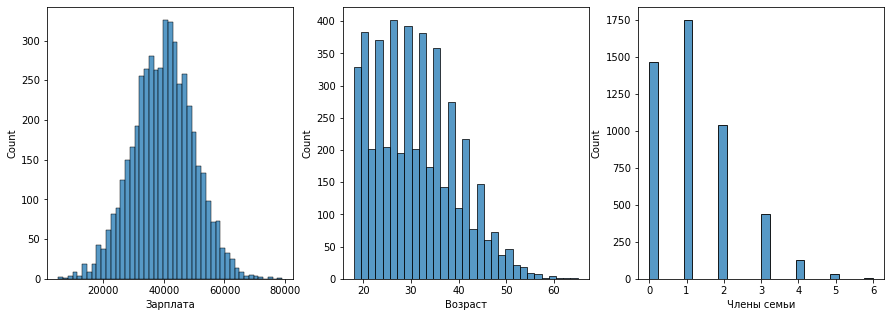

In [6]:
# посмотрим на распределения признаков
plt.figure(figsize=(15,5))
plt.subplot(1, 3, 1)
sns.histplot(data['Зарплата'])
plt.xlabel('Зарплата')
plt.subplot(1, 3, 2)
sns.histplot(data['Возраст']);
plt.xlabel('Возраст')
plt.subplot(1, 3, 3)
sns.histplot(data['Члены семьи']);
plt.xlabel('Члены семьи');

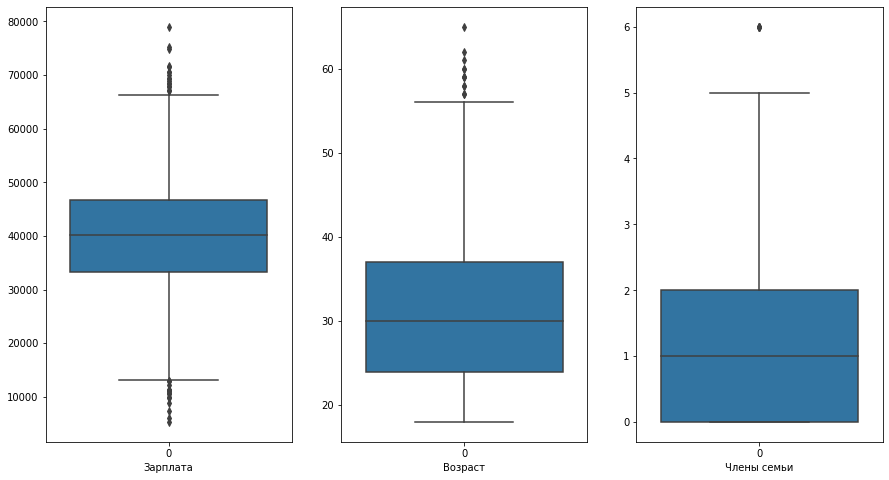

In [7]:
# посмотрим на диаграммы размаха
plt.figure(figsize=(15,8))
plt.subplot(1, 3, 1)
sns.boxplot(data=data['Зарплата'])
plt.xlabel('Зарплата')
plt.subplot(1, 3, 2)
sns.boxplot(data=data['Возраст']);
plt.xlabel('Возраст')
plt.subplot(1, 3, 3)
sns.boxplot(data=data['Члены семьи']);
plt.xlabel('Члены семьи');

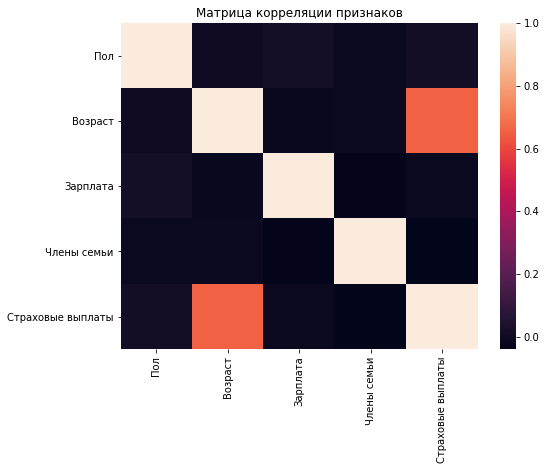

In [8]:
plt.figure(figsize=(8,6))
plt.title('Матрица корреляции признаков')
sns.heatmap(data.corr());

Итак, в датасете 5000 строк. 4 обучающих признака (1 категориальный и 3 числовых). 
- пропусков нет, дубликаты были удалены
- значения признака 'Возраст' имеют распределение, похожее на гребенку. Вероятно, к значениям был применен определенный метод округления;
- в данных есть небольшие выбросы, но на аномалии они не похожи, удалять не будем;
- матрица корреляции показала взаимосвязь целевого признака с возрастом, остальные признаки линейной зависимости не имеют.

## Умножение матриц

Для защиты персональных данных клиентов признаки (то есть сами данные) нужно умножить на обратимую матрицу. При этом не должно пострадать качество модели. В нашей задаче используется модель линейной регрессии. С помощью формул ответим на вопрос, изменятся ли предсказания после умножения признаков на обратимую матрицу.

Обозначения:

- $X$ — матрица признаков (нулевой столбец состоит из единиц)

- $y$ — вектор целевого признака

- $P$ — матрица, на которую умножаются признаки

- $w$ — вектор весов линейной регрессии (нулевой элемент равен сдвигу)

Предсказания:

$$
a = Xw
$$

Задача обучения:

$$
w = \arg\min_w MSE(Xw, y)
$$

Формула обучения:

$$
w = (X^T X)^{-1} X^T y
$$

Обозначим предсказания с учетом умножения на обратимую матрицу как b.Тогда формула предсказаний:

  $ b = XPw $
  
Если a=b, то:

$Xw = XPw$

$X(X^T X)^{-1} X^T y = XP(XP^T XP)^{-1} (XP)^T y$

В правой части уравнения вынесем за скобки $P^{-1}$ и $ P.T^{-1} $

$X(X^T X)^{-1} X^T y = XPP^{-1}(X^T X)^{-1}(P^T)^{-1} (XP)^T y$

Убираем из уравнения $ y$ и $(X^T X)^{-1}$, разделив на них обе части уравнения

$XX^T  = XPP^{-1}(P^T)^{-1}(XP)^T $

Раскроем скобки под транспонированием $(XP)^T$

$XX^T  = XPP^{-1}(P^T)^{-1}P^TX^T $


$P$ на $P^{-1}$ дает единичную матрицу, $(P^T)^{-1}$ на $P^T$ тоже

$XX^T  = XX^T$

Уже видно, что равенство соблюдено. Делим на X

$X^T  = X^T$

То есть a = b. 

**Ответ:** После умножения признаков на обратимую матрицу качество линейной регрессии не поменяется.

**Обоснование:** Предсказания до и после преобразования совпадают, значит, совпадут и метрики. Преобразуются не только признаки, но и веса за счет этой же матрицы. В процессе преобразования уравнения матрица P умножается на свою обратную матрицу, и равенство нивелируется.

Рассморим в дополнение соотношение параметров w и w_p, где:
    
$$
w = (X^T X)^{-1} X^T y
$$
    
    
$$
w_P = (XP^T XP)^{-1} (XP)^T y
$$   

Преобразуем равенство: 
    
$w_P = (XP^T XP)^{-1} (XP)^T y$
    
$w_P = P^{-1}(X^T X)^{-1}(P^T)^{-1} P^T X^T y$
    
$(P^T)^{-1}$ на $P^T$ дает единицу
    
$w_p = P^{-1}(X^T X)^{-1}X^T y$
    
$(X^T X)^{-1}X^T y$ это w, подставим его в уравнение, получим:
    
$w_p = P^{-1}w$
    
Таким образом, вектор весов в преобразованной задаче это произведение вектора весов исходной задачи на матрицу, обратную матрице-ключу.  



Запись $ w = \arg\min_w MSE(Xw, y)$ означает, что задача обучения сводится к поиску параметров, при которых значение метрики MSE будет минимальным.

Делая  замену    w_p на $wP^{-1}$, видим что задача  
    
$$
\arg\min_w MSE(XPw_p, y)
$$
сводится к:
$$
\arg\min_w MSE(Xw, y)
$$    

(так как $Р$ умножается на $P^{-1}$)

## Алгоритм преобразования

**Алгоритм**

Создадим алгоритм преобразования данных путем умножения признаков на рандомную обратимую квадратную матрицу. 

1. Создаем класс преобразования.
2. Создаем функцию fit, принимающую на вход признаки и целевой признак.
3. Генерируем рандомную матрицу-ключ, которая будет умножаться на матрицу исходных признаков. Число ее строк должно совпадать с числом столбцов исходной матрицы. В качестве размера задаем число столбцов исходной матрицы.
4. Проверяем матрицу на обратимость с помощью конструкции try / except. Если матрица необратима, выйдет ошибка.
5. Умножаем сгенерированную матрицу на исходную.
6. Для сокращенной записи предсказаний линейной регрессии добавляем к преобразованной матрице столбец из единиц.
7. Получаем пробразованную матрицу.

In [9]:
class FeaturesTransformed:
    
    def fit(self, features_train, target_train):
        X = features_train
        y = target_train
        self.P = np.random.normal(size=(features_train.shape[1], features_train.shape[1]))
        try:
            check_inv = np.linalg.inv(self.P)
            A = X @ self.P 
            A = np.concatenate((np.ones((features_train.shape[0], 1)), features_train), axis=1)
        except:
            print('Матрица необратима')   
        return A

**Обоснование**

Качество модели линейной регрессии не поменяется, так как признаки умножаются на обратимую квадратную матрицу. Как мы выяснили ранее, это не влияет на качество модели. Поскольку мы применили np.random.normal(size=(features_train.shape[1], features_train.shape[1]), алгоритм будет работать для любой исходной матрицы признаков.

## Проверка алгоритма

Для проверки алгоритма воспользуемся сравнением значений метрик R2 модели линейной регрессии до преобразования и после.

Обучим модель на исходных, затем на преобразованных данных при помощи LinearRegression из sklearn и сравним метрики.

In [10]:
# выделим features и target из датасета

features = data.drop('Страховые выплаты', axis=1)
target = data['Страховые выплаты']

# разделим на обучающую и тестовую
features_train, features_test, target_train, target_test = train_test_split(\
                                                                            features, target, test_size=0.25, random_state=123)

In [11]:
features_train.shape, features_test.shape, target_train.shape, target_test.shape

((3635, 4), (1212, 4), (3635,), (1212,))

In [12]:
# обучим модель на обучаюшей и сделаем предсказания на тестовой выборке (для исходных данных)

model = LinearRegression()
model.fit(features_train, target_train)
pred = model.predict(features_test)

print('Предсказания модели линейной регрессии на тестовой выборке исходных данных:', pred)
print('Значение метрики R2 на тестовой выборке до преобразования:', r2_score(target_test, pred).round(4))

Предсказания модели линейной регрессии на тестовой выборке исходных данных: [-0.15560888 -0.13079143  0.2952292  ...  0.09649265 -0.17041008
 -0.13879448]
Значение метрики R2 на тестовой выборке до преобразования: 0.4098


In [13]:
# применим алгоритм преобразования признаков и сделаем предсказания модели

features_transformed = FeaturesTransformed()
features_transformed_train = features_transformed.fit(features_train, target_train)
features_transformed_test = features_transformed.fit(features_test, target_test)

model = LinearRegression()
model.fit(features_transformed_train, target_train)
pred_transformed = model.predict(features_transformed_test)

print('Предсказания модели линейной регрессии на тестовой выборке после преобразования:', pred_transformed)
print('Значение метрики R2 на тестовой выборке после преобразования:', r2_score(target_test, pred_transformed).round(4))

Предсказания модели линейной регрессии на тестовой выборке после преобразования: [-0.15560888 -0.13079143  0.2952292  ...  0.09649265 -0.17041008
 -0.13879448]
Значение метрики R2 на тестовой выборке после преобразования: 0.4098


Значения метрик совпали.

## Общий вывод

В ходе работы над проектом были подготовлены исходные данные.

Выяснили, что умножение признаков на обратимую матрицу не влияет на качество модели линейной регрессии.

Создан алгоритм для зашифрования данных клиентов (признаков) путем их умножения на рандомную обратимую матрицу.

Проверка алгоритма показала, что качество линейной регрессии из sklearn не отличается до и после преобразования (значения метрик R2 совпали).